# P7: Machine Learning Project
---
#### Author: Justin Schroder
#### Github Link: https://github.com/SchroderJ-pixel/datafun-07-ml
---


#### Imports:

In [131]:
import numpy as np
import pandas as pd
import pyarrow as pa
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

---
### Part 1 - Chart a Straight Line

#### Understanding the Equation of a Line  
The equation of a straight line is:  y = mx + b

where:  
- \( m \) is the slope (rate of change of \( y \) with respect to \( x \))  
- \( b \) is the y-intercept (where the line crosses the y-axis)

For Celsius to Fahrenheit conversion, the formula is:  F = 9/5*C + 32



Step 1: Create Data for Celsius and Fahrenheit

In [132]:
# Generate Celsius values
celsius = np.linspace(-10, 40, 100)  # From -10 to 40 degrees Celsius

# Convert to Fahrenheit
fahrenheit = (9/5) * celsius + 32

# Create a DataFrame
df = pd.DataFrame({'Celsius': celsius, 'Fahrenheit': fahrenheit})


Step 2: Plot the Line

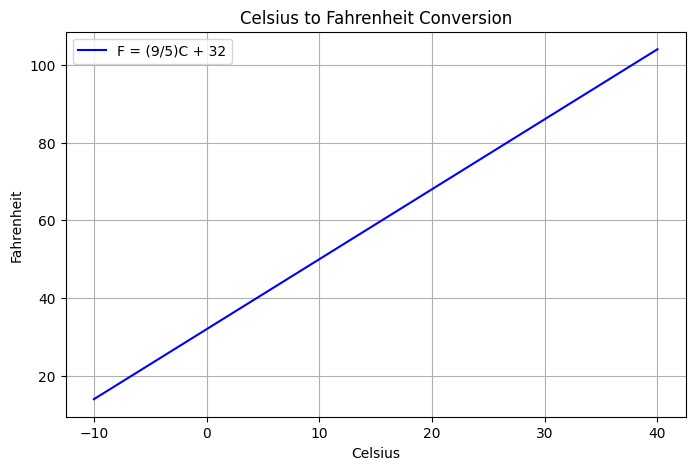

In [133]:
# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(df['Celsius'], df['Fahrenheit'], label='F = (9/5)C + 32', color='blue')

# Labels and title
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.title('Celsius to Fahrenheit Conversion')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

---
### Part 2 - 

#### Section 1 - Data Acquisition

In [134]:
# Load the dataset from the correct link
data_url = "https://raw.githubusercontent.com/pdeitel/IntroToPython/master/examples/ch15/ave_hi_nyc_jan_1895-2018.csv"

# Read CSV into a DataFrame
nyc_df = pd.read_csv(data_url)

# Display first few rows
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


#### Section 2 - Data Inspection

In [135]:
print(nyc_df.head())
print(nyc_df.tail())

     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


#### Section 3 - Data Cleaning

In this section, we cleaned the dataset by renaming the columns for better clarity. The 'Date' column was used to create a new 'Year' column by extracting the first four digits. Since the 'Date' column was no longer needed, it was dropped. We then checked the data types to ensure the 'Year' and 'Temperature' columns were numeric, and verified there were no missing values in the dataset. Finally, a preview of the cleaned data was displayed to confirm the changes.

In [136]:
# Rename columns for clarity
nyc_df.columns = ['Date', 'Temperature', 'Temperature_Anomaly']

# Extract only the first four digits from 'Date' to create a 'Year' column
nyc_df['Year'] = nyc_df['Date'].astype(str).str[:4].astype(int)

# Drop the original 'Date' column since we no longer need it
nyc_df = nyc_df.drop(columns=['Date'])

# Check data types and missing values
print(nyc_df.dtypes)  # Ensure 'Year' and 'Temperature' are numeric
print(nyc_df.isnull().sum())  # Check for missing values
print("_____________________________________________________________")

# Display cleaned data
nyc_df.head()


Temperature            float64
Temperature_Anomaly    float64
Year                     int64
dtype: object
Temperature            0
Temperature_Anomaly    0
Year                   0
dtype: int64
_____________________________________________________________


,Temperature,Temperature_Anomaly,Year
0,34.2,-3.2,1895
1,34.7,-2.7,1896
2,35.5,-1.9,1897
3,39.6,2.2,1898
4,36.4,-1.0,1899


#### Section 4 - Descriptive Statistics
Calculate basic statistics like mean, median, and standard deviation.

In [137]:
# Set display precision
pd.set_option('display.precision', 2)

# Display descriptive statistics
nyc_df.describe()

,Temperature,Temperature_Anomaly,Year
count,124.00,124.00,124.00
mean,37.60,0.20,1956.50
std,4.54,4.54,35.94
min,26.10,-11.30,1895.00
25%,34.58,-2.82,1925.75
50%,37.60,0.20,1956.50
75%,40.60,3.20,1987.25
max,47.60,10.20,2018.00


#### Section 5 - Build the Model

In this section, we used the `linregress` function from SciPy to calculate the best-fit line for predicting the average high temperature in January based on the year. The slope and intercept were computed, along with the R-squared value, which indicates how well the data fits the line. A high R-squared value (close to 1) suggests a strong correlation, while a low p-value (< 0.05) indicates that the regression model is statistically significant. The standard error shows the variability of the slope estimate.

In [138]:
# Importing the necessary library
from scipy.stats import linregress

# Perform linear regression to find the best-fit line
slope, intercept, r_value, p_value, std_err = linregress(nyc_df['Year'], nyc_df['Temperature'])

# Calculate R-squared
r_squared = r_value ** 2

# Print the results
print(f"Slope of the line (m): {slope:.4f}")
print(f"Intercept of the line (b): {intercept:.2f}")
print(f"R-squared value: {r_squared:.2f}")  # A value close to 1 indicates a strong fit
print(f"P-value: {p_value:.4f}")  # Indicates the statistical significance of the regression
print(f"Standard Error: {std_err:.4f}")  # Reflects the accuracy of the slope estimate


Slope of the line (m): 0.0148
Intercept of the line (b): 8.69
R-squared value: 0.01
P-value: 0.1959
Standard Error: 0.0114


#### Section 6 - Predict

We use the linear regression model to predict the average high temperature in January for 2024 based on the calculated slope and intercept.

In [139]:
# Predict the average high temperature for January 2024 using the model
year_to_predict = 2024
predicted_temp = slope * year_to_predict + intercept

# Display the predicted temperature
print(f"Predicted average high temperature in January {year_to_predict}: {predicted_temp:.2f}°F")

Predicted average high temperature in January 2024: 38.59°F


#### Section 6 - Visualizations
The scatter plot with the red regression line shows how the average high temperature in January has changed over the years, visually representing the temperature trend from 1895 to 2024.

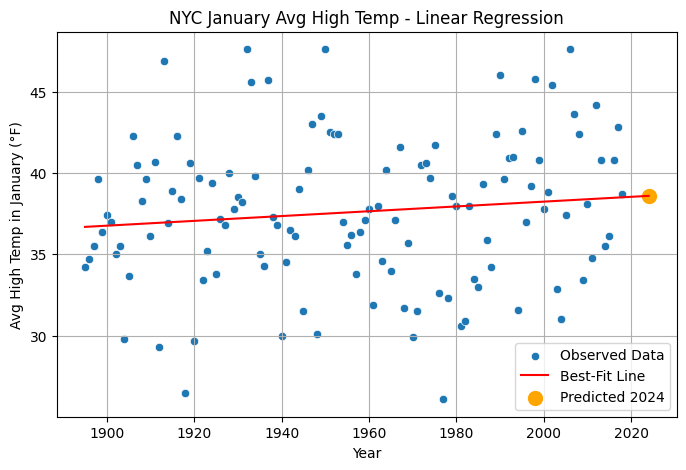

In [140]:
# Plot the data points
plt.figure(figsize=(8, 5))
sns.scatterplot(x=nyc_df['Year'], y=nyc_df['Temperature'], label='Observed Data')

# Plot regression line
years_future = list(range(nyc_df['Year'].min(), 2025))  # Extend range to 2024
predicted_temps = [slope * year + intercept for year in years_future]
sns.lineplot(x=years_future, y=predicted_temps, color='red', label='Best-Fit Line')

# Highlight prediction for 2024
predicted_temp_2024 = slope * 2024 + intercept  # Predict temperature for 2024
plt.scatter(2024, predicted_temp_2024, color='orange', marker='o', s=100, label='Predicted 2024')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Avg High Temp in January (°F)')
plt.title('NYC January Avg High Temp - Linear Regression')
plt.legend()
plt.grid()

# Show plot
plt.show()
